In [15]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Funcs

def get_d(ap):
    median = (549. - 365) / 2
    return (median + (ap*3.6)/14) * 1.06 * 1.03 * 1.02

def get_phys_d(d, p_crit, p_dodge):
    return ( d * ( (p_glance * f_glance) + (p_crit * f_crit ) + (1 - p_glance - p_crit - p_dodge) ) ) / (1 - p_dodge)


In [5]:
# Constants

p_glance = 0.24
f_glance = 0.75
f_crit = 2.06
dodge_cap = 0.065

crit_cap_no_expertise = 1 - dodge_cap - p_glance
crit_cap_expertise_cap = 1 - p_glance

# Test damage with 2k AP
my_d = get_d(2000)

test_crit = 0.3
p_dodge = 0.065


675.1815977142858

In [14]:
# Compare the projected autoattack damage given a certain crit under two different dodge scenarios.

test_crit = 0.30
p_dodge1 = 0.065
p_dodge2 = 0.005

print(f'test crit rating = {test_crit}')
print(f'case 1 dodge chance = {p_dodge1}')
print(f'case 2 dodge chance = {p_dodge2}')

my_d = get_d(2000)
print(f'average attack damage on a hit roll: {my_d}')

dodge1_phys_d = get_phys_d(my_d, test_crit, p_dodge1)
dodge2_phys_d = get_phys_d(my_d, test_crit, p_dodge2)

print(f'p_dodge = {p_dodge1} case 1, d_phys = {dodge1_phys_d}')
print(f'p_dodge = {p_dodge2} case 2, d_phys = {dodge2_phys_d}')

ave_d_1 = dodge1_phys_d * (1 - p_dodge1)
ave_d_2 = dodge2_phys_d * (1 - p_dodge2)

print(f'projected autoattack damage case 1 = {ave_d_1}')
print(f'projected autoattack damage case 2 = {ave_d_2}')

test crit rating = 0.3
case 1 dodge chance = 0.065
case 2 dodge chance = 0.005
average attack damage on a hit roll: 675.1815977142858
p_dodge = 0.065 case 1, d_phys = 861.488391522078
p_dodge = 0.005 case 2, d_phys = 850.253810990955
projected autoattack damage case 1 = 805.491646073143
projected autoattack damage case 2 = 846.0025419360002


Text(0.5, 1.0, 'Autoattack damage with WF, crit chance = 0.15')

Text(0, 0.5, 'Projected damage')

Text(0.5, 0, 'Dodge Chance')

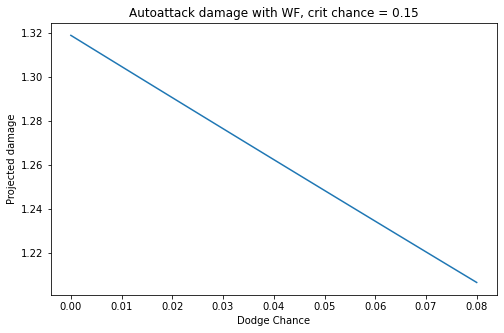

In [40]:
# Creating vectors X and Y
p_crit = 0.15

x = np.linspace(0, 0.08, 100)
y = (1 - x + 0.2*(1 - 2*x + x**2)) * ((p_glance*f_glance + p_crit*f_crit + (1 - p_glance-x - p_crit))/(1-x))
 
fig = plt.figure(figsize = (8, 5))
# Create the plot
plt.plot(x, y)
plt.title(f'Autoattack damage with WF, crit chance = {p_crit}')
plt.ylabel('Projected damage')
plt.xlabel('Dodge Chance')

# Show the plot
plt.show()

In [41]:
def get_proj_dam(p_crit, p_dodge):
    return (1 - p_dodge + 0.2*(1 - 2*p_dodge + p_dodge**2)) * ((p_glance*f_glance + p_crit*f_crit + (1 - p_glance - p_dodge - p_crit))/(1-p_dodge))


In [45]:
dam_crit30_dodge0 = get_proj_dam(0.3, 0.0)
dam_crit10_dodge0 = get_proj_dam(0.1, 0.0)

dam_crit30_dodge0 / dam_crit10_dodge0

1.2026768642447419

In [48]:
dam_crit50_dodge0 = get_proj_dam(0.5, 0.0)
dam_crit10_dodge0 = get_proj_dam(0.1, 0.0)

dam_crit50_dodge0 / dam_crit10_dodge0

1.4053537284894837

In [49]:
dam_crit50_dodge06 = get_proj_dam(0.5, 0.06)
dam_crit10_dodge06 = get_proj_dam(0.1, 0.06)

dam_crit50_dodge06 / dam_crit10_dodge06

1.4300202839756593

In [50]:
1.4053 / 1.43

0.9827272727272728

In [53]:
dam_crit10_dodge06 = get_proj_dam(0.4, 0.80)
dam_crit10_dodge06

0.58656